In [31]:
from qiskit import *
from math import *
import qiskit.ignis.verification.tomography as tomo

#----------Pour simulation noiseless---------------
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
QASM_simulator = Aer.get_backend('qasm_simulator')

#----------POUR CALCULS ON QC---------------------
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_essex')
from qiskit.tools.monitor import job_monitor

#----------Pour simuler with noise le QC chargé au dessus: ----------
from qiskit.providers.aer import noise
properties = qcomp.properties()
coupling_map = qcomp.configuration().coupling_map
# (Generate an Aer noise model for qcomp)
noise_model = noise.device.basic_device_noise_model(properties)
basis_gates = noise_model.basis_gates

F:\Anaconda\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


In [17]:
TypeOfRun = 2
#1 == simulator w/o noise
#2 == simulator w noise
#3 == QC

dx = 0.1
dN = 2500
N = 7500

a = []
b = []
c = []
d = []
Exp_Val = []

k = 1 #To count how many times we want to do the same experience

#loop for the number of times the experiment is done
while True: 
    i = 0
    N = N + dN
    #k = k+1
    
    
    if TypeOfRun == 1 :
        filestream=open('QVE_p_sim_N='+str(N)+'_'+str(k)+'.txt','w+')
    elif TypeOfRun == 2 :
        filestream=open('QVE_w_noise_N='+str(N)+'_'+str(k)+'.txt','w+')
    elif TypeOfRun == 3 :
        filestream=open('QVE_qc_N='+str(N)+'.txt','w+')
        
    a.clear()
    a.append(3)
    b.clear()
    b.append(3)
    c.clear()
    c.append(3)
    d.clear()
    d.append(3)
    Exp_Val.clear()
    
    #main loop, stops when smaller than epsilon 
    while True:

        normalisation = sqrt(a[i]**2+b[i]**2+c[i]**2+d[i]**2)

        starting_vector = [
            a[i]/normalisation,
            b[i]/normalisation,
            c[i]/normalisation,
            d[i]/normalisation]

        n = 2 #number of qubit


        circuit = QuantumCircuit(n, n, name="initializer_circ")
        circuit.initialize(starting_vector, [0, 1])

        circuit.h(0)

        circuit.measure(range(n), range(n))
        if TypeOfRun == 1:
            result = execute(circuit, backend=QASM_simulator, shots=N).result()
        elif TypeOfRun == 2:
            result = execute(circuit, backend = QASM_simulator,
                      coupling_map=coupling_map,
                      noise_model=noise_model,
                      basis_gates=basis_gates,
                      shots=N).result()
        elif TypeOfRun == 3:
            job = execute(circuit, backend=qcomp, shots = N)
            job_monitor(job)
            result = job.result()

        counts = result.get_counts(circuit)

        A = 0
        if counts.get('00'):
            A = A + counts.get('00')
        if counts.get('01'):
            A = A - counts.get('01')
        if counts.get('10'):
            A = A + counts.get('10')
        if counts.get('11'):
            A = A - counts.get('11')
        A = A / N
        
        circuit = QuantumCircuit(n, n, name="initializer_circ")
        circuit.initialize(starting_vector, [0, 1])

        circuit.h(1)

        circuit.measure(range(n), range(n))
        if TypeOfRun == 1:
            result = execute(circuit, backend=QASM_simulator, shots=N ).result()
        elif TypeOfRun == 2:
            result = execute(circuit, backend = QASM_simulator,
                      coupling_map=coupling_map,
                      noise_model=noise_model,
                      basis_gates=basis_gates,
                      shots=N).result()
        elif TypeOfRun == 3:
            job = execute(circuit, backend=qcomp, shots = N)
            job_monitor(job)
            result = job.result()

        counts = result.get_counts(circuit)

        B = 0
        if counts.get('00'):
            B = B + counts.get('00')
        if counts.get('01'):
            B = B + counts.get('01')
        if counts.get('10'):
            B = B - counts.get('10')
        if counts.get('11'):
            B = B - counts.get('11')
        B = B / N


        circuit = QuantumCircuit(n, n, name="initializer_circ")
        circuit.initialize(starting_vector, [0, 1])


        circuit.measure(range(n), range(n))
        if TypeOfRun == 1:
            result = execute(circuit, backend=QASM_simulator, shots =N).result()
        elif TypeOfRun == 2:
            result = execute(circuit, backend = QASM_simulator,
                      coupling_map=coupling_map,
                      noise_model=noise_model,
                      basis_gates=basis_gates,
                      shots=N).result()
        elif TypeOfRun == 3:
            job = execute(circuit, backend=qcomp, shots = N)
            job_monitor(job)
            result = job.result()

        counts = result.get_counts(circuit)

        C = 0
        if counts.get('00'):
            C = C + counts.get('00')
        if counts.get('01'):
            C = C - counts.get('01')
        if counts.get('10'):
            C = C - counts.get('10')
        if counts.get('11'):
            C = C + counts.get('11')
        C = C / N

        Exp_Val.append(0.5*(A+B)+C)


        a.append(a[i]-dx*( ((2*a[i]+b[i]+c[i])*normalisation -2*a[i]*(a[i]**2+a[i]*b[i]+a[i]*c[i]-b[i]**2+b[i]*d[i]-c[i]**2+c[i]*d[i]+d[i]**2)) / (normalisation**2)))
        b.append(b[i]-dx*( ((a[i]-2*b[i]+d[i])*normalisation -2*b[i]*(a[i]**2+a[i]*b[i]+a[i]*c[i]-b[i]**2+b[i]*d[i]-c[i]**2+c[i]*d[i]+d[i]**2)) / (normalisation**2)))
        c.append(c[i]-dx*( ((a[i]-2*c[i]+d[i])*normalisation -2*c[i]*(a[i]**2+a[i]*b[i]+a[i]*c[i]-b[i]**2+b[i]*d[i]-c[i]**2+c[i]*d[i]+d[i]**2)) / (normalisation**2)))
        d.append(a[i]-dx*( ((b[i]+c[i]+2*d[i])*normalisation -2*d[i]*(a[i]**2+a[i]*b[i]+a[i]*c[i]-b[i]**2+b[i]*d[i]-c[i]**2+c[i]*d[i]+d[i]**2)) / (normalisation**2)))

        filestream.write(str(Exp_Val[i])+'\n')
        
        i = i+1
        if(abs(a[i]-a[i-1])<0.0001 and abs(b[i]-b[i-1])<0.0001 and abs(c[i]-c[i-1])<0.0001 and abs(d[i]-d[i-1])<0.0001):
            break
    filestream.close()
    print(str(N))
    if(N >= 10000):
    #print(str(k))
    #if(k >= 100):
        break


10000


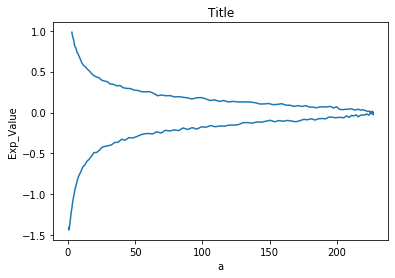

In [8]:
import matplotlib.pyplot as plt 

# plotting the points  
plt.plot(b[0:len(a)-1], Exp_Val) 
  
# naming the x axis 
plt.xlabel('a') 
# naming the y axis 
plt.ylabel('Exp_Value') 
  
# giving a title to my graph 
plt.title('Title') 
  
# function to show the plot 
plt.show() 

In [41]:
Exp_Val

[0.987,
 0.9032999999999999,
 0.8577,
 0.8145,
 0.7684000000000001,
 0.744,
 0.6982999999999999,
 0.6714,
 0.6173000000000001,
 0.5976999999999999,
 0.5680000000000001,
 0.5417000000000001,
 0.516,
 0.49529999999999996,
 0.4857,
 0.4622,
 0.4477000000000001,
 0.4227,
 0.42310000000000003,
 0.406,
 0.39080000000000004,
 0.38220000000000004,
 0.3549,
 0.36840000000000006,
 0.3219999999999999,
 0.3304,
 0.3394,
 0.31850000000000006,
 0.31000000000000005,
 0.29669999999999996,
 0.30129999999999996,
 0.2713,
 0.27449999999999997,
 0.25950000000000006,
 0.2896,
 0.27659999999999996,
 0.25049999999999994,
 0.2563,
 0.24180000000000001,
 0.23870000000000002,
 0.22970000000000013,
 0.22319999999999995,
 0.2169000000000001,
 0.1985,
 0.21740000000000004,
 0.2026,
 0.1953999999999999,
 0.19220000000000004,
 0.20129999999999992,
 0.20420000000000005,
 0.1857000000000001,
 0.1894,
 0.18980000000000008,
 0.18480000000000008,
 0.17620000000000002,
 0.16859999999999997,
 0.16659999999999997,
 0.1643,
